# Getting Started with EXES Data

# Calculating Doppler Shift for a Specific Time of Year

In [4]:

__all__ = ['helio2lsr', 'vgeo', 'jdcnv', 'baryvel','premat']

def helio2lsr(vhelio,vlsr,ra,dec,reverse):
    import math


   #From helio2lsr.proo
    solarmotion_ra = ((18.0+3.0/6.0e1+50.29/3.6e3)*15.0)*(math.pi/180.)
    solarmotion_dec = (30.0+0.0/6.0e1+16.8/3.6e3)*(math.pi/180.)
    solarmotion_mag = 20.0

    deldec2 = (dec-solarmotion_dec)/2.0
    delra2 =  (ra-solarmotion_ra)/2.0
    sindis = math.sqrt(math.sin(deldec2)*math.sin(deldec2) + 
                       math.cos(solarmotion_dec)*math.cos(dec)*math.sin(delra2)*math.sin(delra2) )
    theta = 2.0*math.asin(sindis) 

    if reverse:
        vhelio = vlsr - solarmotion_mag*math.cos(theta)

    else:

        vlsr = vhelio + solarmotion_mag*math.cos(theta) 
    
    return vhelio,vlsr
    
def jdcnv(year, month, day, hour):
    import math
    
    L = int((month-14)/12) #In leap years, -1 for Jan, Feb, else 0

    julian = day - 32075 + int(1461*(year+4800+L)/4) + int(367*(month - 2-L*12)/12) - int(3*((year+4900+L)/100)/4)

    julian = float(julian) + (hour/24.0) - 0.5

    return julian
    

def baryvel(dje, deq=0):
    import numpy as np
    #import math
    
    dc2pi = 2.0 * np.pi
    cc2pi = 2.0 * np.pi 
    dc1 = 1.0e0
    dcto = 2415020.0e0
    dcjul = 36525.0e0                     #days in Julian year
    dcbes = 0.313e0
    dctrop = 365.24219572e0               #days in tropical year (...572 insig)
    dc1900 = 1900.0e0
    au = 1.4959787e8
 
   #Constants dcfel(i,k) of fast changing elements.
    dcfel = np.array([1.7400353e00, 6.2833195099091e02, 5.2796e-6, 6.2565836e00, 6.2830194572674e02, -2.6180e-6, 
                   4.7199666e00, 8.3997091449254e03, -1.9780e-5, 1.9636505e-1, 8.4334662911720e03, -5.6044e-5, 
                   4.1547339e00, 5.2993466764997e01, 5.8845e-6, 4.6524223e00, 2.1354275911213e01, 5.6797e-6, 
                   4.2620486e00, 7.5025342197656e00, 5.5317e-6, 1.4740694e00, 3.8377331909193e00, 5.6093e-6])
    
    dcfel = np.reshape(dcfel, (8, 3))
   
   #constants dceps and ccsel(i,k) of slowly changing elements.
    dceps = np.array([4.093198e-1, -2.271110e-4, -2.860401e-8])
    ccsel = np.array([1.675104e-2, -4.179579e-5, -1.260516e-7, 2.220221e-1, 2.809917e-2, 1.852532e-5, 1.589963e00, 
                  3.418075e-2, 1.430200e-5, 2.994089e00, 2.590824e-2, 4.155840e-6, 8.155457e-1, 2.486352e-2, 
                  6.836840e-6, 1.735614e00, 1.763719e-2, 6.370440e-6, 1.968564e00, 1.524020e-2, -2.517152e-6, 
                  1.282417e00, 8.703393e-3, 2.289292e-5, 2.280820e00, 1.918010e-2, 4.484520e-6, 4.833473e-2, 
                  1.641773e-4, -4.654200e-7, 5.589232e-2, -3.455092e-4, -7.388560e-7, 4.634443e-2, -2.658234e-5, 
                  7.757000e-8, 8.997041e-3, 6.329728e-6, -1.939256e-9, 2.284178e-2, -9.941590e-5, 6.787400e-8, 
                  4.350267e-2, -6.839749e-5, -2.714956e-7, 1.348204e-2, 1.091504e-5, 6.903760e-7, 3.106570e-2, 
                  -1.665665e-4, -1.590188e-7])
    
    ccsel = np.reshape(ccsel, (17, 3))
   
   #Constants of the arguments of the short-period perturbations.
    dcargs = np.array([5.0974222e0, -7.8604195454652e2, 3.9584962e0, -5.7533848094674e2, 1.6338070e0, 
                    -1.1506769618935e3, 2.5487111e0, -3.9302097727326e2, 4.9255514e0, -5.8849265665348e2, 
                    1.3363463e0, -5.5076098609303e2, 1.6072053e0, -5.2237501616674e2, 1.3629480e0, 
                    -1.1790629318198e3, 5.5657014e0, -1.0977134971135e3, 5.0708205e0, -1.5774000881978e2, 
                    3.9318944e0, 5.2963464780000e1, 4.8989497e0, 3.9809289073258e1, 1.3097446e0, 
                    7.7540959633708e1, 3.5147141e0, 7.9618578146517e1, 3.5413158e0, -5.4868336758022e2])
    
    dcargs = np.reshape(dcargs, (15, 2))
   
   #Amplitudes ccamps(n,k) of the short-period perturbations.
    ccamps = np.array([-2.279594e-5, 1.407414e-5, 8.273188e-6, 1.340565e-5, -2.490817e-7, -3.494537e-5, 
                    2.860401e-7, 1.289448e-7, 1.627237e-5, -1.823138e-7, 6.593466e-7, 1.322572e-5, 9.258695e-6, 
                    -4.674248e-7, -3.646275e-7, 1.140767e-5, -2.049792e-5, -4.747930e-6, -2.638763e-6, 
                    -1.245408e-7, 9.516893e-6, -2.748894e-6, -1.319381e-6, -4.549908e-6, -1.864821e-7, 
                    7.310990e-6, -1.924710e-6, -8.772849e-7, -3.334143e-6, -1.745256e-7, -2.603449e-6, 
                    7.359472e-6, 3.168357e-6, 1.119056e-6, -1.655307e-7, -3.228859e-6, 1.308997e-7, 
                    1.013137e-7, 2.403899e-6, -3.736225e-7, 3.442177e-7, 2.671323e-6, 1.832858e-6, 
                    -2.394688e-7, -3.478444e-7, 8.702406e-6, -8.421214e-6, -1.372341e-6, -1.455234e-6, 
                    -4.998479e-8, -1.488378e-6, -1.251789e-5, 5.226868e-7, -2.049301e-7, 0.0e0, -8.043059e-6, 
                    -2.991300e-6, 1.473654e-7, -3.154542e-7, 0.0e0, 3.699128e-6, -3.316126e-6, 2.901257e-7, 
                    3.407826e-7, 0.0e0, 2.550120e-6, -1.241123e-6, 9.901116e-8, 2.210482e-7, 0.0e0, -6.351059e-7, 
                    2.341650e-6, 1.061492e-6, 2.878231e-7, 0.0e0])
    
    ccamps = np.reshape(ccamps, (15, 5))
   
   #Constants csec3 and ccsec(n,k) of the secular perturbations in longitude.
    ccsec3 = -7.757020e-8
    ccsec = np.array([1.289600e-6, 5.550147e-1, 2.076942e00, 3.102810e-5, 4.035027e00, 3.525565e-1, 9.124190e-6, 
                   9.990265e-1, 2.622706e00, 9.793240e-7, 5.508259e00, 1.559103e01])
    
    ccsec = np.reshape(ccsec, (4, 3))
   
   #Sidereal rates.
    dcsld = 1.990987e-7                   #sidereal rate in longitude
    ccsgd = 1.990969e-7                   #sidereal rate in mean anomaly
   
   #Constants used in the calculation of the lunar contribution.
    cckm = 3.122140e-5
    ccmld = 2.661699e-6
    ccfdi = 2.399485e-7
   
   #Constants dcargm(i,k) of the arguments of the perturbations of the motion
   # of the moon.
    dcargm = np.array([5.1679830e0, 8.3286911095275e3, 5.4913150e0, -7.2140632838100e3, 5.9598530e0, 
                    1.5542754389685e4])
    
    dcargm = np.reshape(dcargm, (3, 2))
   
   #Amplitudes ccampm(n,k) of the perturbations of the moon.
    ccampm = np.array([1.097594e-1, 2.896773e-7, 5.450474e-2, 1.438491e-7, -2.223581e-2, 5.083103e-8, 1.002548e-2, 
                    -2.291823e-8, 1.148966e-2, 5.658888e-8, 8.249439e-3, 4.063015e-8])
    
    ccampm = np.reshape(ccampm, (3, 4))
   
   #ccpamv(k)=a*m*dl,dt (planets), dc1mme=1-mass(earth+moon)
    ccpamv = np.array([8.326827e-11, 1.843484e-11, 1.988712e-12, 1.881276e-12])
    dc1mme = 0.99999696e0
   
   #Time arguments.
    dt = (dje - dcto) / dcjul
    tvec = np.array([1e0, dt, dt * dt])
   
   #Values of all elements for the instant(aneous?) dje.
    temp = (np.transpose(np.dot(np.transpose(tvec), np.transpose(dcfel)))) % dc2pi
    dml = temp[0]
    forbel = temp[1:8]
    g = forbel[0]                         #old fortran equivalence
   
    deps = (tvec * dceps).sum() % dc2pi
    sorbel = (np.transpose(np.dot(np.transpose(tvec), np.transpose(ccsel)))) % dc2pi
    e = sorbel[0]                         #old fortran equivalence
   
   #Secular perturbations in longitude.
    dummy = np.cos(2.0)
    sn = np.sin((np.transpose(np.dot(np.transpose(tvec[0:2]), np.transpose(ccsec[:,1:3])))) % cc2pi)
   
   #Periodic perturbations of the emb (earth-moon barycenter).
    pertl = (ccsec[:,0] * sn).sum() + dt * ccsec3 * sn[2]
    pertld = 0.0
    pertr = 0.0
    pertrd = 0.0
   
    for k in range(0, 15):
        a = (dcargs[k,0] + dt * dcargs[k,1]) % dc2pi
        cosa = np.cos(a)
        sina = np.sin(a)
        pertl = pertl + ccamps[k,0] * cosa + ccamps[k,1] * sina
        pertr = pertr + ccamps[k,2] * cosa + ccamps[k,3] * sina
        
        if k < 11:   
            pertld = pertld + (ccamps[k,1] * cosa - ccamps[k,0] * sina) * ccamps[k,4]
            pertrd = pertrd + (ccamps[k,3] * cosa - ccamps[k,2] * sina) * ccamps[k,4]
   
   #Elliptic part of the motion of the emb.
    phi = (e * e / 4e0) * (((8e0 / e) - e) * np.sin(g) + 5 * np.sin(2 * g) + (13 / 3e0) * e * np.sin(3 * g))
    f = g + phi
    sinf = np.sin(f)
    cosf = np.cos(f)
    dpsi = (dc1 - e * e) / (dc1 + e * cosf)
    phid = 2 * e * ccsgd * ((1 + 1.5 * e * e) * cosf + e * (1.25 - 0.5 * sinf * sinf))
    psid = ccsgd * e * sinf / np.sqrt(dc1 - e * e)
   
   #Perturbed heliocentric motion of the emb.
    d1pdro = dc1 + pertr
    drd = d1pdro * (psid + dpsi * pertrd)
    drld = d1pdro * dpsi * (dcsld + phid + pertld)
    dtl = (dml + phi + pertl) % dc2pi
    dsinls = np.sin(dtl)
    dcosls = np.cos(dtl)
    dxhd = drd * dcosls - drld * dsinls
    dyhd = drd * dsinls + drld * dcosls
   
   #Influence of eccentricity, evection and variation on the geocentric
   # motion of the moon.
    pertl = 0.0
    pertld = 0.0
    pertp = 0.0
    pertpd = 0.0
    
    for k in range(0, 3):
        a = (dcargm[k,0] + dt * dcargm[k,1]) % dc2pi
        sina = np.sin(a)
        cosa = np.cos(a)
        pertl = pertl + ccampm[k,0] * sina
        pertld = pertld + ccampm[k,1] * cosa
        pertp = pertp + ccampm[k,2] * cosa
        pertpd = pertpd - ccampm[k,3] * sina
   
   #Heliocentric motion of the earth.
    tl = forbel[1] + pertl
    sinlm = np.sin(tl)
    coslm = np.cos(tl)
    sigma = cckm / (1.0 + pertp)
    a = sigma * (ccmld + pertld)
    b = sigma * pertpd
    dxhd = dxhd + a * sinlm + b * coslm
    dyhd = dyhd - a * coslm + b * sinlm
    dzhd = -sigma * ccfdi * np.cos(forbel[2])
   
   #Barycentric motion of the earth.
    dxbd = dxhd * dc1mme
    dybd = dyhd * dc1mme
    dzbd = dzhd * dc1mme
    
    for k in range(0, 4):
        plon = forbel[k + 3]
        pomg = sorbel[k + 1]
        pecc = sorbel[k + 9]
        tl = (plon + 2.0 * pecc * np.sin(plon - pomg)) % cc2pi
        dxbd = dxbd + ccpamv[k] * (np.sin(tl) + pecc * np.sin(pomg))
        dybd = dybd - ccpamv[k] * (np.cos(tl) + pecc * np.cos(pomg))
        dzbd = dzbd - ccpamv[k] * sorbel[k + 13] * np.cos(plon - sorbel[k + 5])
      
   
   #Transition to mean equator of date.
    dcosep = np.cos(deps)
    dsinep = np.sin(deps)
    dyahd = dcosep * dyhd - dsinep * dzhd
    dzahd = dsinep * dyhd + dcosep * dzhd
    dyabd = dcosep * dybd - dsinep * dzbd
    dzabd = dsinep * dybd + dcosep * dzbd
   
   #Epoch of mean equinox (deq) of zero implies that we should use
   # Julian ephemeris date (dje) as epoch of mean equinox.
    if deq == 0:   
        dvelh = au * (np.array([dxhd, dyahd, dzahd]))
        dvelb = au * (np.array([dxbd, dyabd, dzabd]))
        return (dvelh,dvelb)
   
   #General precession from epoch dje to deq.
    deqdat = (dje - dcto - dcbes) / dctrop + dc1900
    prema = premat(deqdat, deq, fk4=True)
   
    dvelh = au * (np.transpose(np.dot(np.transpose(prema), np.transpose(np.array([dxhd, dyahd, dzahd])))))
    dvelb = au * (np.transpose(np.dot(np.transpose(prema), np.transpose(np.array([dxbd, dyabd, dzabd])))))
   
    return (dvelh, dvelb)

def premat(equinox1, equinox2, fk4):
    import numpy as np
    
    deg_to_rad = np.pi / 180.0e0
    sec_to_rad = deg_to_rad / 3600.0e0
    
    t = 0.001e0 * (equinox2 - equinox1)
   
    if not fk4:   
        st = 0.001e0 * (equinox1 - 2000.0e0)
      #  Compute 3 rotation angles
        a = sec_to_rad * t * (23062.181e0 + st * (139.656e0 + 0.0139e0 * st) + t * 
                              (30.188e0 - 0.344e0 * st + 17.998e0 * t))
      
        b = sec_to_rad * t * t * (79.280e0 + 0.410e0 * st + 0.205e0 * t) + a
      
        c = sec_to_rad * t * (20043.109e0 - st * (85.33e0 + 0.217e0 * st) + t * 
                              (-42.665e0 - 0.217e0 * st - 41.833e0 * t))
      
    else:   
        st = 0.001e0 * (equinox1 - 1900.0e0)
      #  Compute 3 rotation angles
      
        a = sec_to_rad * t * (23042.53e0 + st * (139.75e0 + 0.06e0 * st) + t * 
                              (30.23e0 - 0.27e0 * st + 18.0e0 * t))
      
        b = sec_to_rad * t * t * (79.27e0 + 0.66e0 * st + 0.32e0 * t) + a
      
        c = sec_to_rad * t * (20046.85e0 - st * (85.33e0 + 0.37e0 * st) + t * 
                              (-42.67e0 - 0.37e0 * st - 41.8e0 * t))
      
   
    sina = np.sin(a)
    sinb = np.sin(b)
    sinc = np.sin(c)
    cosa = np.cos(a)
    cosb = np.cos(b)
    cosc = np.cos(c)
   
    r = np.zeros((3, 3))
    r[0,:] = np.array([cosa * cosb * cosc - sina * sinb, sina * cosb + cosa * sinb * cosc, cosa * sinc])
    r[1,:] = np.array([-cosa * sinb - sina * cosb * cosc, cosa * cosb - sina * sinb * cosc, -sina * sinc])
    r[2,:] = np.array([-cosb * sinc, -sinb * sinc, cosc])
   
    return r
    
if __name__ == '__main__':    
    import numpy as np
    import math

    #IRC +10216 Example
    v_lsr   = -26.5  #km s^-1
    v_helio = 0.00   #km s^-1
    v_exp   = 14.50  #km s^-1
    #RA & Dec from SIMBAD
    ra_in = [9.0, 47.0, 57.40632]
    sign = +1.0
    dec_in = [13.0, 16.0, 43.5648]
    #True: calculate from v_lsr || False: calculate from v_helio
    reverse = True 
    #Time of year can be found in headers "DATE-OBS", "UTCSTART", &"UTCEND"
    #or can enter any future date & time for proposals 
    year = 2018
    month = 10
    day = 18
    #I try to pick the midpoint of UTCSTART & UTCEND
    #For this example UTCSTART: 11:41:54.562 & UTCEND: 11:48:47.515
    #UTCSTART -> UTCEND ~ 412 seconds, so midpoint is UTCSTART + 206 seconds
    hour = 11.0 + (45.0/60.0) + (21.0/3600.0)
    epoch = 2000.0
    vh = np.empty(3)
    vb = np.empty(3)
    for i in range(0,3):
        vh[i] = 0.0
        vb[i] = 0.0

    #convert to radians
    ra_star = 15.*(ra_in[0]+ra_in[1]/60.+ra_in[2]/3600.)*(math.pi/180.)
    dec_star = sign*(abs(dec_in[0])+dec_in[1]/60.+dec_in[2]/3600.)*(math.pi/180.)
    
    helio,lsr = helio2lsr(v_helio,v_lsr,ra_star,dec_star,reverse)

    #print(helio)
    #print(lsr)
    
    jd = jdcnv(year,month,day,hour)
    #print(jd)
    
    vh,vb = baryvel(jd,epoch)
    #print(vh)
    #print(vb)
    
    vgeo =  vh[0]*math.cos(dec_star)*math.cos(ra_star) + vh[1]*math.cos(dec_star)*math.sin(ra_star) + vh[2]*math.sin(dec_star) 
    
    corrVel = helio-vgeo

    print('Just systemic velocity:')
    print(corrVel)
    print('Systemic Velocity with expansion velocity factored in:')
    print(corrVel-v_exp)






Just systemic velocity:
-45.533342034576386
Systemic Velocity with expansion velocity factored in:
-60.033342034576386


# Plot Data (see EXES-Data-Inspection.ipynb)

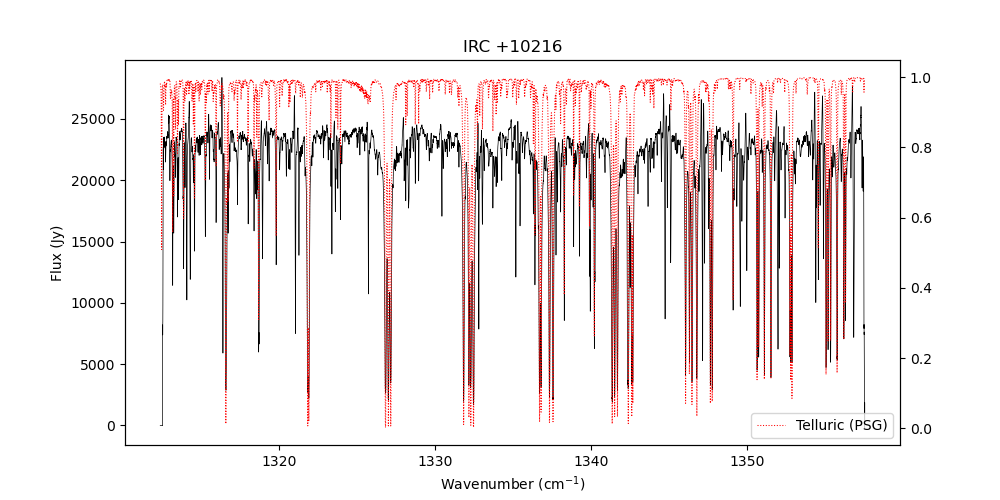

In [5]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import astropy.units as u
import warnings
warnings.simplefilter('ignore')
%matplotlib widget

# import fits file
file_name = "/Volumes/Metatron/OC6L/EXES_F0514/g14_irc10216_hilo_1333cm-1/F0514_EX_SPE_0601445_EXEELONEXEECHL_MRD_10127-10128.fits"
hdu = fits.open(file_name)

# data columns to variables with units
vel_off = -60.033342034576386/2.9979e5 #velocity offset / speed of light
wavenumber = hdu[0].data[0] * (1.0+vel_off)
flux_unit = u.Jy
flux = hdu[0].data[1] * flux_unit
uncertainty = hdu[0].data[2] * flux_unit
psg = hdu[0].data[3]

# Plot the whole spectrum
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(wavenumber, flux, lw=0.5, c="k")
ax2.plot(wavenumber, psg, lw=0.75, c="r", linestyle=":", label="Telluric (PSG)")
ax1.set_ylabel(r"Flux (Jy)")
ax1.set_xlabel(r"Wavenumber (cm$^{-1}$)")
plt.legend()
plt.title("IRC +10216")
plt.show()

# Generating a Synthetic Spectrum with HITRAN Online

# Part 1: Downloading a table with HAPI

In [6]:
import numpy as np
import math
import sys
from hapi import *
import hapi as hp

#read molecule parameters
hp.fetch('C2H2',23,1,1300,1400)

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Part 2 Making the synthetic spectrum (via code from Pablo Fonfría)

Provide the HITRAN isotopologue code for the molecule: 1
Starting frequency limit (cm-1): 1312
Ending frequency limit (cm-1): 1358
Excitation temperature (K): 700
Column density (cm-2): 1.0e18
FWHM of each line (km/s): 10.0
Name of the output data file: testC2H2.txt


Calculating opacity.... 
Creating the frequency grid.... 


Calculating the spectrum.... 


Writing the spectrum to testC2H2.txt....


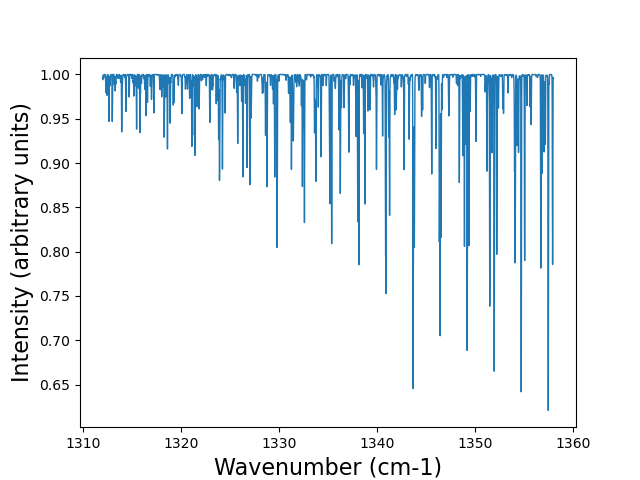

In [5]:
import numpy as np
import math
import sys
from hapi import *
import hapi as hp
#line below needed to make plots interactive!!
%matplotlib widget
#line above needed to make plots interactive!!
import matplotlib.pyplot as plt


beta=1.4387686603334
c=299792.458 #km s-1
#below in cgs units!!
mH2=3.34E-24               
kb=1.380658E-16
pi=3.14159265358979323846

wing=10.0 #chosen a wing of 10sigma. It can be reduced to reduce the calculation time


#read molecule parameters
#hp.fetch('H2O',1,1,1400,1500)
#hp.select('H2O',ParameterNames=['local_iso_id','nu','sw','elower'])#,Conditions=('between','nu',1400,1500))

isotope,freq,opa,elow = getColumns('C2H2',['local_iso_id','nu','sw','elower'])

#elow = np.asarray(elow).astype(np.float64)


iso = int(input('Provide the HITRAN isotopologue code for the molecule: '))
lowFreq = float(input('Starting frequency limit (cm-1): '))
hiFreq = float(input('Ending frequency limit (cm-1): '))
Tkp = float(input('Excitation temperature (K): '))
Ncol = float(input('Column density (cm-2): '))
FWHM = float(input('FWHM of each line (km/s): '))
sigma = FWHM/(2.0*math.sqrt(np.log(2.0)))

outFile = input('Name of the output data file: ')


modIso  = isotope[isotope == iso]
modFreq = freq[isotope == iso]
modOpa  = opa[isotope == iso]
modElow = elow[isotope == iso]
sz = modIso.shape
n = sz[0]
#if (n == 0):
#    errMsg = 'No isotope with isotope= '+str(iso)+' found.'
#    sys.exit(errMsg)
#print(n)

print('')
print('')
print('Calculating opacity.... ')

Tk = 296.0 #K; don't touch. It is the temperature used in HITRAN to calculate the line opacity

#print(modOpa)
modOpa = modOpa*((Tk/Tkp)*np.exp(-beta*modElow*(1.0/Tkp-1.0/Tk))*(1.0-np.exp(-beta*modFreq/Tkp))/(1.0-np.exp(-beta*modFreq/Tk)))
#print(modOpa)

#for i in range(0,n):
#    modOpa[i] = modOpa[i]*((Tk/Tkp)*np.exp(-beta*modElow[i]*(1.0/Tkp-1.0/Tk))*(1.0-np.exp(-beta*modFreq[i]/Tkp))/(1.0-np.exp(-beta*modFreq[i]/Tk)))
#print(modOpa)

print('Creating the frequency grid.... ')
## Assumes at least five points per FWHM. I choose f1 to express the FWHM in
## cm-1 to get the smallest step.

if(lowFreq != 0.0):
    m=10*math.ceil((hiFreq-lowFreq)/(FWHM/c*lowFreq))
else:
    m=10*math.ceil((hiFreq-lowFreq)/(FWHM/c*1.0))

x = np.empty(m)
y = np.empty(m)
for i in range(0,m):
    x[i] = 0.0
    y[i] = 0.0

x[0] = lowFreq
x[-1] = hiFreq
delta = (x[-1]-x[0])/(m-1.0)
for i in range(0,m-2):
    x[i+1] = x[i]+delta

print('')
print('')
print('Calculating the spectrum.... ')


inside = False
j0 = 0

for i in range(0,m):
    for j in range(j0,n):
        if((modFreq[j]-x[i]) > ((wing*sigma)/(c*modFreq[j]))):
            pass
            
        elif(((x[i]-modFreq[j]) < ((wing*sigma)/(c*modFreq[j]))) and (inside == False)):
            #print('Here')
            inside = True
            j0 = j
            #print(j0)

        y[i] = y[i] + modOpa[j]*math.exp(-(x[i]-modFreq[j])**2.0/(sigma/c*modFreq[j])**2.0)/((sigma/c*modFreq[j])*math.sqrt(pi))
    inside = False

y=np.exp(-y*Ncol)

print('')
print('')
print('Writing the spectrum to '+outFile+'....')


outF = open(outFile,'w')
#infTest = np.isinf(y)
#y[infTest] = 1.0
for i in range(0,m):
    outF.write('%f %s %f\n' % (x[i],'  ',y[i]))
outF.close()


plt.figure('Synthetic Spectrum Preview')
plt.plot(x,y,linewidth=1)
plt.xlabel('Wavenumber (cm-1)',fontsize=16)
plt.ylabel('Intensity (arbitrary units)',fontsize=16)
plt.show()


# Plotting slab model over data

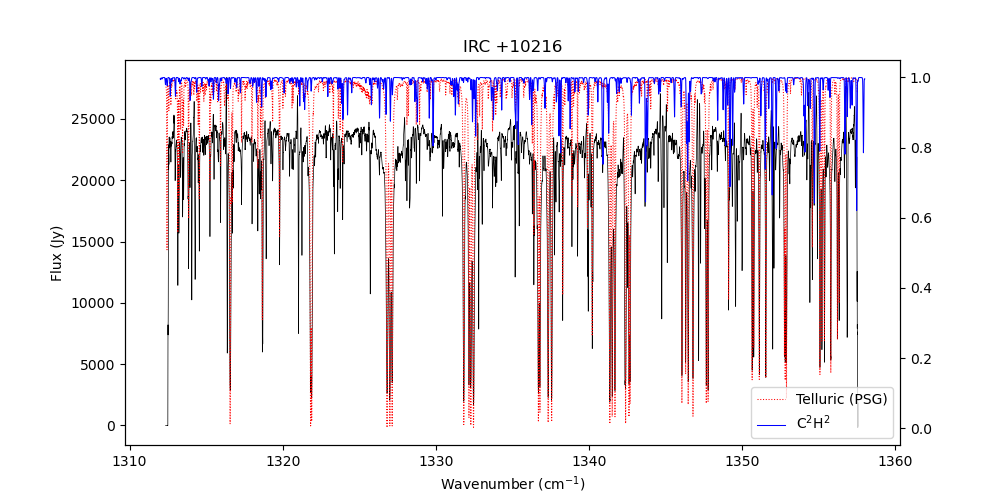

In [7]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import astropy.units as u
import warnings
warnings.simplefilter('ignore')
%matplotlib widget

# import fits file
file_name = "/Volumes/Metatron/OC6L/EXES_F0514/g14_irc10216_hilo_1333cm-1/F0514_EX_SPE_0601445_EXEELONEXEECHL_MRD_10127-10128.fits"
hdu = fits.open(file_name)

# data columns to variables with units 
vel_off = -60.033342034576386/2.9979e5 #velocity offset / speed of light
wavenumber = hdu[0].data[0] * (1.0+vel_off)
flux_unit = u.Jy
flux = hdu[0].data[1] * flux_unit
uncertainty = hdu[0].data[2] * flux_unit
psg = hdu[0].data[3]


c2h2file = 'testC2H2.txt'
f = open(c2h2file,'r')
lines=f.readlines()
waven = []
inten  = []

for x in lines:
    waven.append(x.split()[0])
    inten.append(x.split()[1])
f.close()

waven = np.asarray(waven).astype(np.float64)
inten = np.asarray(inten).astype(np.float64)


# Plot the whole spectrum
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
ax1.plot(wavenumber, flux, lw=0.5, c="k")
ax2.plot(wavenumber, psg, lw=0.75, c="r", linestyle=":", label="Telluric (PSG)")
ax2.plot(waven, inten, lw=0.75, c="b", label="C$^2$H$^2$")
ax1.set_ylabel(r"Flux (Jy)")
ax1.set_xlabel(r"Wavenumber (cm$^{-1}$)")
plt.legend()
plt.title("IRC +10216")
plt.show()

# Working with Absorption Cross Sections from ExoMol

Name of the input data file: 1H2-16O_700-800_700K_0.010000.sigma
Value for exponent (e.g. -1.0e18): -1.0e18
Smoothing factor (e.g. 2): 2
Reading 1H2-16O_700-800_700K_0.010000.sigma....


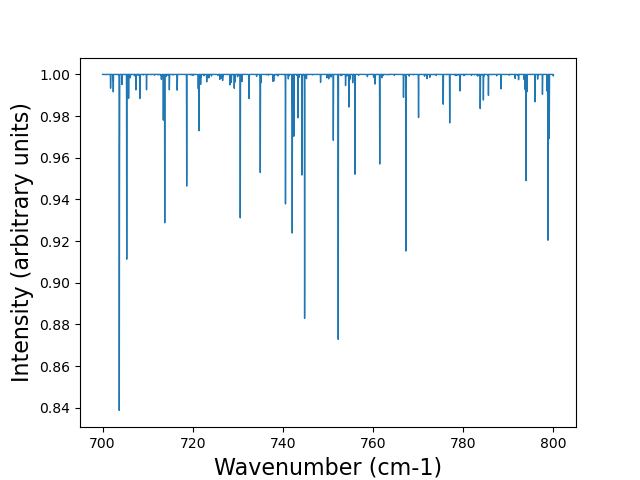

In [3]:
import numpy as np
import math
import sys
import time
#line below needed to make plots interactive!!
%matplotlib widget
#line above needed to make plots interactive!!
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import warnings
warnings.simplefilter('ignore')

# import fits file
directory = '/Users/emontiel/EXES--PostDoc/Data/AGBStars/'
file = input('Name of the input data file: ')  #1H2-16O_700-800_700K_0.010000.sigma
value = float(input('Value for exponent (e.g. -1.0e18): '))
smooth = float(input('Smoothing factor (e.g. 2): '))

f = open(directory+file,'r')
lines=f.readlines()
wvn = []
sig    = []

print('Reading '+file+'....')
for x in lines:
        wvn.append(x.split()[0])
        sig.append(x.split()[1])

f.close()

wvn = np.asarray(wvn).astype(np.float64)
sig = np.asarray(sig).astype(np.float64)

#gauss_smooth(exp(-5.5d18*y),2)
fx = gaussian_filter(np.exp(value*sig),sigma=smooth)
fx2 = gaussian_filter(np.exp(-value*sig),sigma=smooth)


plt.figure('Synthetic Spectrum Preview')
plt.plot(wvn,fx,linewidth=1)
plt.xlabel('Wavenumber (cm-1)',fontsize=16)
plt.ylabel('Intensity (arbitrary units)',fontsize=16)
plt.show()